In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
with open('batting_data.pkl', 'rb') as cellar:
    bat_dict = pickle.load(cellar)
with open('fielding_data.pkl','rb') as cellar:
    field_dict = pickle.load(cellar)
with open('pitching_data.pkl','rb') as cellar:
    pitch_dict = pickle.load(cellar)

In [4]:
attend_df = pd.read_csv('mlb-game-time-attendance-etc.csv')
attend_df.head(10)

,Year,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
0,2019,30,2429,3:10,3:05,208.0,8.56,9.66,76.8,3.93,10.3,4.41,1.18,0.14,24.9,31.0,68494752.0,28198.0,$3999827072.00,$133327569.00
1,2018,30,2431,3:04,3:00,216.0,8.89,8.90,76.1,3.90,10.4,4.36,1.16,0.16,24.7,29.7,69671272.0,28659.0,$3964096903.00,$132136563.00
2,2017,30,2430,3:08,3:05,182.0,7.49,9.29,76.2,3.89,10.3,4.22,1.13,0.15,24.2,28.0,72678797.0,29908.0,$3983892634.00,$132796421.00
3,2016,30,2428,3:04,3:00,185.0,7.62,8.96,76.0,3.88,10.4,4.15,1.12,0.16,24.2,27.5,73159044.0,30131.0,$3761011880.00,$125367062.00
4,2015,30,2429,3:00,2:56,212.0,8.73,8.50,75.6,3.83,10.4,4.11,1.16,0.18,24.5,27.0,73719340.0,30349.0,$3680887206.00,$122696240.00
5,2014,30,2430,3:07,3:02,232.0,9.55,8.13,75.7,3.83,10.3,3.98,1.14,0.17,24.8,24.8,73739622.0,30345.0,$3398869156.00,$113295638.00
6,2013,30,2431,3:04,2:58,243.0,10.00,8.33,76.0,3.84,10.3,3.95,1.12,0.17,24.5,24.2,74027037.0,30451.0,$3150727861.00,$105024262.00
7,2012,30,2430,3:00,2:55,192.0,7.90,8.65,75.8,3.83,10.3,3.99,1.14,0.18,24.7,24.1,74859268.0,30806.0,$2950092506.00,$98336416.00
8,2011,30,2429,2:56,2:51,237.0,9.76,8.57,76.3,3.82,10.3,3.86,1.08,0.19,24.5,23.6,73425667.0,30228.0,$2872256542.00,$95741884.00
9,2010,30,2430,2:54,2:50,220.0,9.05,8.77,76.3,3.83,10.3,3.87,1.14,0.18,24.0,22.8,73061763.0,30066.0,$2757480197.00,$91916006.00


In [6]:
asg_df = pd.read_csv('ASG-ratings.csv')
asg_df.head()

,Year,Network,Ratings,Share,Households,Viewers
0,1967,NBC,25.6,50,"14,050,000",NotAvailable
1,1968,NBC,25.8,49,"14,450,000",NotAvailable
2,1969,NBC,15.1,42,"8,610,000",NotAvailable
3,1970,NBC,28.5,54,"16,670,000",NotAvailable
4,1971,NBC,27.0,50,"16,230,000",NotAvailable


In [7]:
ws_df = pd.read_csv('WS-ratings.csv')
ws_df.head()

,Year,Nework,Ratings,Share,Viewers,Rank
0,1968,NBC,22.8,57,--,--
1,1969,NBC,22.4,58,--,--
2,1970,NBC,19.4,53,--,--
3,1971,NBC,24.2,59,--,--
4,1972,NBC,27.6,58,--,--


In [8]:
bat_df = bat_dict['LgAvg']
bat_df.head()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
1901,23,28.1,4.99,139,5317,4819,692,1310,183,77,...,.360,.686,94,1733,,52,105,,,
1902,24,28.3,4.43,140,5267,4768,619,1272,177,61,...,.344,.665,94,1638,,45,115,,,
1903,23,28.4,4.44,139,5222,4715,618,1236,190,73,...,.346,.664,94,1634,,46,126,,,
1904,23,28.5,3.72,156,5697,5156,581,1273,178,72,...,.321,.622,94,1657,,49,139,,,1012
1905,24,28.7,3.89,155,5710,5115,602,1269,179,70,...,.323,.630,93,1651,,51,157,,,1010


In [9]:
pitch_df = pitch_dict['LgAvg']
field_df = field_dict['LgAvg']

In [11]:
pop_df = pd.read_csv('us-pop.csv')
pop_df.head()

,Date,Population
0,2020-04-01,329.46 million
1,2019-07-01,328.24 million
2,2018-07-01,326.69 million
3,2017-07-01,324.99 million
4,2016-07-01,322.94 million


In [14]:
pop_df['Year']=pop_df['Date'].str[:4].astype(int)
pop_df.head(3)

,Date,Population,Year
0,2020-04-01,329.46 million,2020
1,2019-07-01,328.24 million,2019
2,2018-07-01,326.69 million,2018


In [21]:
pop_df['Pop']=pop_df['Population'].str[:6].str.strip().astype(float).multiply(10**6)

In [22]:
pop_df.head(3)

,Date,Population,Year,Pop
0,2020-04-01,329.46 million,2020,329460000.0
1,2019-07-01,328.24 million,2019,328240000.0
2,2018-07-01,326.69 million,2018,326690000.0


I have all the data I expect I will want to play with. Now I will set all the new dataframes to have string four digit year indices just like the stat dataframes (I think!), then pull all the attendance (game time, salary, etc.) data into a single dataframe that should be nicely matched up by year index.

attend_df

asg_df

ws_df

pop_df

In [24]:
attend_df.set_index('Year',inplace=True)
attend_df.head(3)

,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
Year,,,,,,,,,,,,,,,,,,,
2019,30,2429,3:10,3:05,208.0,8.56,9.66,76.8,3.93,10.3,4.41,1.18,0.14,24.9,31.0,68494752.0,28198.0,$3999827072.00,$133327569.00
2018,30,2431,3:04,3:00,216.0,8.89,8.90,76.1,3.90,10.4,4.36,1.16,0.16,24.7,29.7,69671272.0,28659.0,$3964096903.00,$132136563.00
2017,30,2430,3:08,3:05,182.0,7.49,9.29,76.2,3.89,10.3,4.22,1.13,0.15,24.2,28.0,72678797.0,29908.0,$3983892634.00,$132796421.00


In [25]:
asg_df.set_index('Year',inplace=True)
ws_df.set_index('Year',inplace=True)
pop_df.set_index('Year',inplace=True)

In [26]:
attend_df.sort_index().head()

,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
Year,,,,,,,,,,,,,,,,,,,
1876,8,260,NaN,NaN,NaN,NaN,11.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1877,6,180,NaN,NaN,NaN,NaN,11.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,6,184,NaN,NaN,NaN,NaN,10.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,8,321,NaN,NaN,NaN,NaN,10.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,8,340,NaN,NaN,NaN,NaN,9.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
interest_df = pd.concat([pop_df,asg_df,ws_df,attend_df],axis=1)
interest_df.tail()

,Date,Population,Pop,Network,Ratings,Share,Households,Viewers,Nework,Ratings,...,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
Year,,,,,,,,,,,,,,,,,,,,,
2016,2016-07-01,322.94 million,322940000.0,FOX,5.4,10.0,"5,981,000","8,707,000",FOX,12.9,...,10.4,4.15,1.12,0.16,24.2,27.5,73159044.0,30131.0,$3761011880.00,$125367062.00
2017,2017-07-01,324.99 million,324990000.0,FOX,5.5,11.0,"7,312,000","9,280,000",FOX,10.6,...,10.3,4.22,1.13,0.15,24.2,28.0,72678797.0,29908.0,$3983892634.00,$132796421.00
2018,2018-07-01,326.69 million,326690000.0,NaN,NaN,NaN,NaN,NaN,FOX,8.3,...,10.4,4.36,1.16,0.16,24.7,29.7,69671272.0,28659.0,$3964096903.00,$132136563.00
2019,2019-07-01,328.24 million,328240000.0,NaN,NaN,NaN,NaN,NaN,FOX,8.1,...,10.3,4.41,1.18,0.14,24.9,31.0,68494752.0,28198.0,$3999827072.00,$133327569.00
2020,2020-04-01,329.46 million,329460000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
interest_df.columns

Index(['Date', 'Population', 'Pop', 'Network', 'Ratings', 'Share',
       'Households', 'Viewers', 'Nework', 'Ratings', 'Share', 'Viewers',
       'Rank', 'Tms', 'G', 'Time', 'Time/9I', 'Inn', 'Inn%', 'R/G', 'PA/G',
       'Pitches/PA', 'Batters/G', 'Pitchers/G', 'PH/G', 'PR/G', 'Batters/S',
       'Pitchers/S', 'Attendance', 'Attend/G', 'Lg Payroll*', 'Payroll/Tm*'],
      dtype='object')

In [41]:
interest_df.drop(['Date','Population','Rank'],axis=1,inplace=True)

In [42]:
interest_df.drop(2020,inplace=True)

In [43]:
interest_df.tail()

,Pop,Network,Ratings,Share,Households,Viewers,Nework,Ratings,Share,Viewers,...,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*
Year,,,,,,,,,,,,,,,,,,,,,
2015,320640000.0,FOX,6.6,12.0,"9,127,000","10,900,000",FOX,8.6,16.0,"14,533,000",...,10.4,4.11,1.16,0.18,24.5,27.0,73719340.0,30349.0,$3680887206.00,$122696240.00
2016,322940000.0,FOX,5.4,10.0,"5,981,000","8,707,000",FOX,12.9,22.0,"22,847,000",...,10.4,4.15,1.12,0.16,24.2,27.5,73159044.0,30131.0,$3761011880.00,$125367062.00
2017,324990000.0,FOX,5.5,11.0,"7,312,000","9,280,000",FOX,10.6,20.0,"18,705,000",...,10.3,4.22,1.13,0.15,24.2,28.0,72678797.0,29908.0,$3983892634.00,$132796421.00
2018,326690000.0,NaN,NaN,NaN,NaN,NaN,FOX,8.3,17.0,"14,125,000",...,10.4,4.36,1.16,0.16,24.7,29.7,69671272.0,28659.0,$3964096903.00,$132136563.00
2019,328240000.0,NaN,NaN,NaN,NaN,NaN,FOX,8.1,16.0,"13,912,000",...,10.3,4.41,1.18,0.14,24.9,31.0,68494752.0,28198.0,$3999827072.00,$133327569.00


In [44]:
interest_df['NormAtt']=interest_df['Attendance']/interest_df['Pop']
interest_df['NormAtt/G']=interest_df['Attend/G']/interest_df['Pop']

In [45]:
interest_df.sample(5)

,Pop,Network,Ratings,Share,Households,Viewers,Nework,Ratings,Share,Viewers,...,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*,NormAtt,NormAtt/G
Year,,,,,,,,,,,,,,,,,,,,,
2013,315990000.0,FOX,6.9,12.0,"7,511,000","11,000,000",FOX,8.9,15.0,"14,984,000",...,1.12,0.17,24.5,24.2,74027037.0,30451.0,$3150727861.00,$105024262.00,0.234270,0.000096
1941,133400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.96,0.13,22.9,15.4,9689603.0,7789.0,NaN,NaN,0.072636,0.000058
1914,99110000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.77,0.14,25.5,12.3,4454988.0,3546.0,NaN,NaN,0.044950,0.000036
2005,295520000.0,FOX,8.1,14.0,"8,884,000","12,330,000",FOX,11.1,19.0,"17,162,000",...,1.16,0.18,23.5,21.8,74915268.0,30816.0,$2189013398.00,$72967113.00,0.253503,0.000104
1906,85450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5719289.0,4657.0,NaN,NaN,0.066931,0.000054


In [46]:
bat_df.sample()

,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,...,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
2003,41,29.2,4.73,162,6249,5558,766,1469,294,31,...,.422,.755,97,2346,128,62,54,45,44,1149


In [47]:
bat_df.columns

Index(['#Bat', 'BatAge', 'R/G', 'G', 'PA', 'AB', 'R', 'H', '2B', '3B', 'HR',
       'RBI', 'SB', 'CS', 'BB', 'SO', 'BA', 'OBP', 'SLG', 'OPS', 'OPS+', 'TB',
       'GDP', 'HBP', 'SH', 'SF', 'IBB', 'LOB'],
      dtype='object')

In [50]:
with open('bb-int.pkl','wb') as cellar:
    pickle.dump(interest_df,cellar)

In [56]:
slug_df=bat_df[['G','BA','OBP','SLG','OPS','OPS+']].astype(float)

In [57]:
slug_df.sample(10)

,G,BA,OBP,SLG,OPS,OPS+
1904,156.0,0.247,0.301,0.321,0.622,94.0
1917,156.0,0.249,0.311,0.324,0.635,94.0
1931,155.0,0.278,0.339,0.391,0.731,94.0
1933,153.0,0.270,0.330,0.376,0.706,94.0
1901,139.0,0.272,0.327,0.360,0.686,94.0
1987,162.0,0.263,0.331,0.415,0.747,97.0
1966,162.0,0.249,0.310,0.376,0.686,93.0
1949,155.0,0.263,0.344,0.384,0.728,94.0
1932,154.0,0.277,0.337,0.400,0.737,94.0
1941,156.0,0.262,0.334,0.375,0.709,93.0


In [58]:
slug_df['Year']=slug_df.index.astype(float)

In [59]:
slug_df.sample(10)

,G,BA,OBP,SLG,OPS,OPS+,Year
1942,153.0,0.253,0.323,0.350,0.674,93.0,1942.0
1953,155.0,0.264,0.336,0.397,0.733,94.0,1953.0
1940,155.0,0.267,0.334,0.392,0.726,93.0,1940.0
1989,162.0,0.254,0.320,0.375,0.695,97.0,1989.0
2015,162.0,0.254,0.317,0.405,0.721,97.0,2015.0
1979,161.0,0.265,0.330,0.397,0.727,97.0,1979.0
1927,155.0,0.284,0.345,0.393,0.738,94.0,1927.0
2006,162.0,0.269,0.337,0.432,0.768,97.0,2006.0
1991,162.0,0.256,0.323,0.385,0.708,97.0,1991.0
1920,154.0,0.276,0.335,0.372,0.707,94.0,1920.0


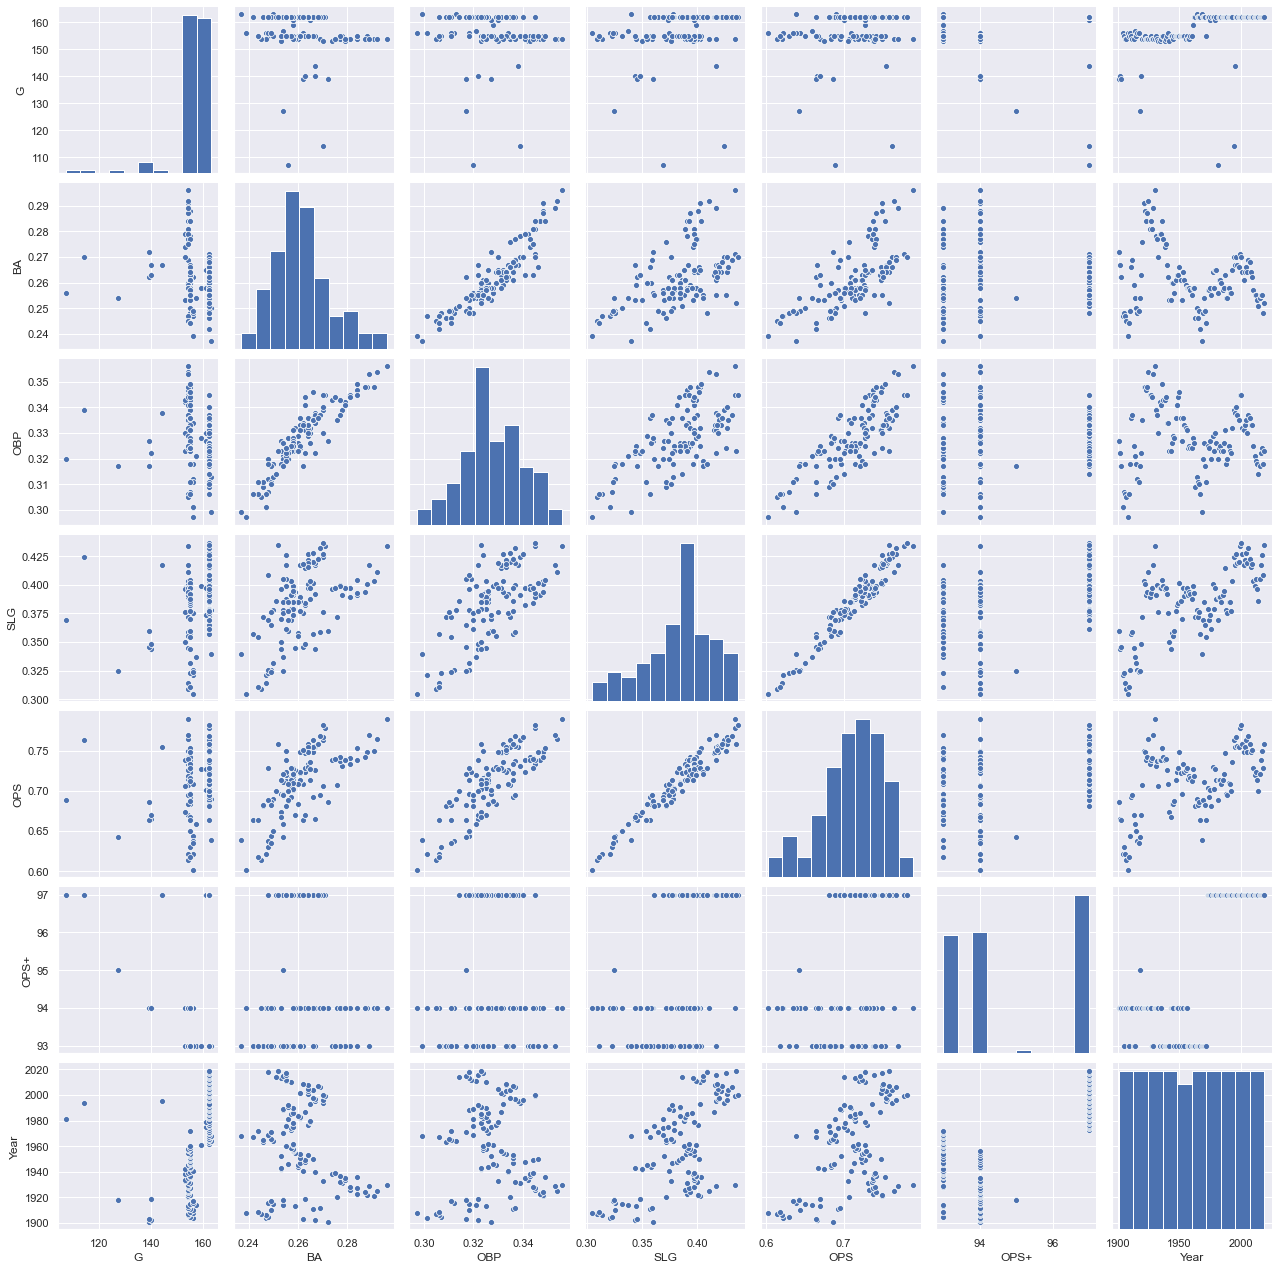

In [60]:
sns.pairplot(slug_df)

In [62]:
bat_df['Year']=bat_df.index.astype(int)

In [74]:
del slug_rate_df
slug_rate_df = bat_df[['Year','G','R/G']].astype(float)
slug_rate_df['PA/G']=bat_df['PA'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['AB/G']=bat_df['AB'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['H/G']=bat_df['H'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['HR/G']=bat_df['HR'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['RBI/G']=bat_df['RBI'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['BB/G']=bat_df['BB'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['SO/G']=bat_df['SO'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['TB/G']=bat_df['TB'].astype(float)/bat_df['G'].astype(float)
#slug_rate_df['GDP/G']=bat_df['GDP'].astype(float)/bat_df['G'].astype(float)
slug_rate_df['HBP/G']=bat_df['HBP'].astype(float)/bat_df['G'].astype(float)
#slug_rate_df['IBB/G']=bat_df['IBB'].astype(float)/bat_df['G'].astype(float)
#slug_rate_df['LOB/G']=bat_df['LOB'].astype(float)/bat_df['G'].astype(float)

In [75]:
slug_rate_df.sample(7)

,Year,G,R/G,PA/G,AB/G,H/G,HR/G,RBI/G,BB/G,SO/G,TB/G,HBP/G
1971,1971.0,162.0,3.89,37.734568,33.574074,8.370370,0.734568,3.623457,3.222222,5.388889,12.265432,0.209877
1954,1954.0,155.0,4.38,38.522581,33.845161,8.832258,0.780645,4.103226,3.645161,4.116129,13.206452,0.180645
1906,1906.0,154.0,3.61,36.318182,32.493506,8.012987,0.103896,2.954545,2.506494,3.694805,10.214286,0.298701
1951,1951.0,155.0,4.55,38.716129,34.303226,8.948387,0.748387,4.245161,3.729032,3.761290,13.225806,0.180645
1989,1989.0,162.0,4.13,37.993827,33.907407,8.617284,0.734568,3.851852,3.209877,5.617284,12.722222,0.191358
1957,1957.0,154.0,4.31,38.714286,34.461039,8.876623,0.896104,4.064935,3.311688,4.850649,13.480519,0.207792
1937,1937.0,155.0,4.87,38.774194,34.664516,9.587097,0.574194,4.516129,3.406452,3.632258,13.819355,0.129032


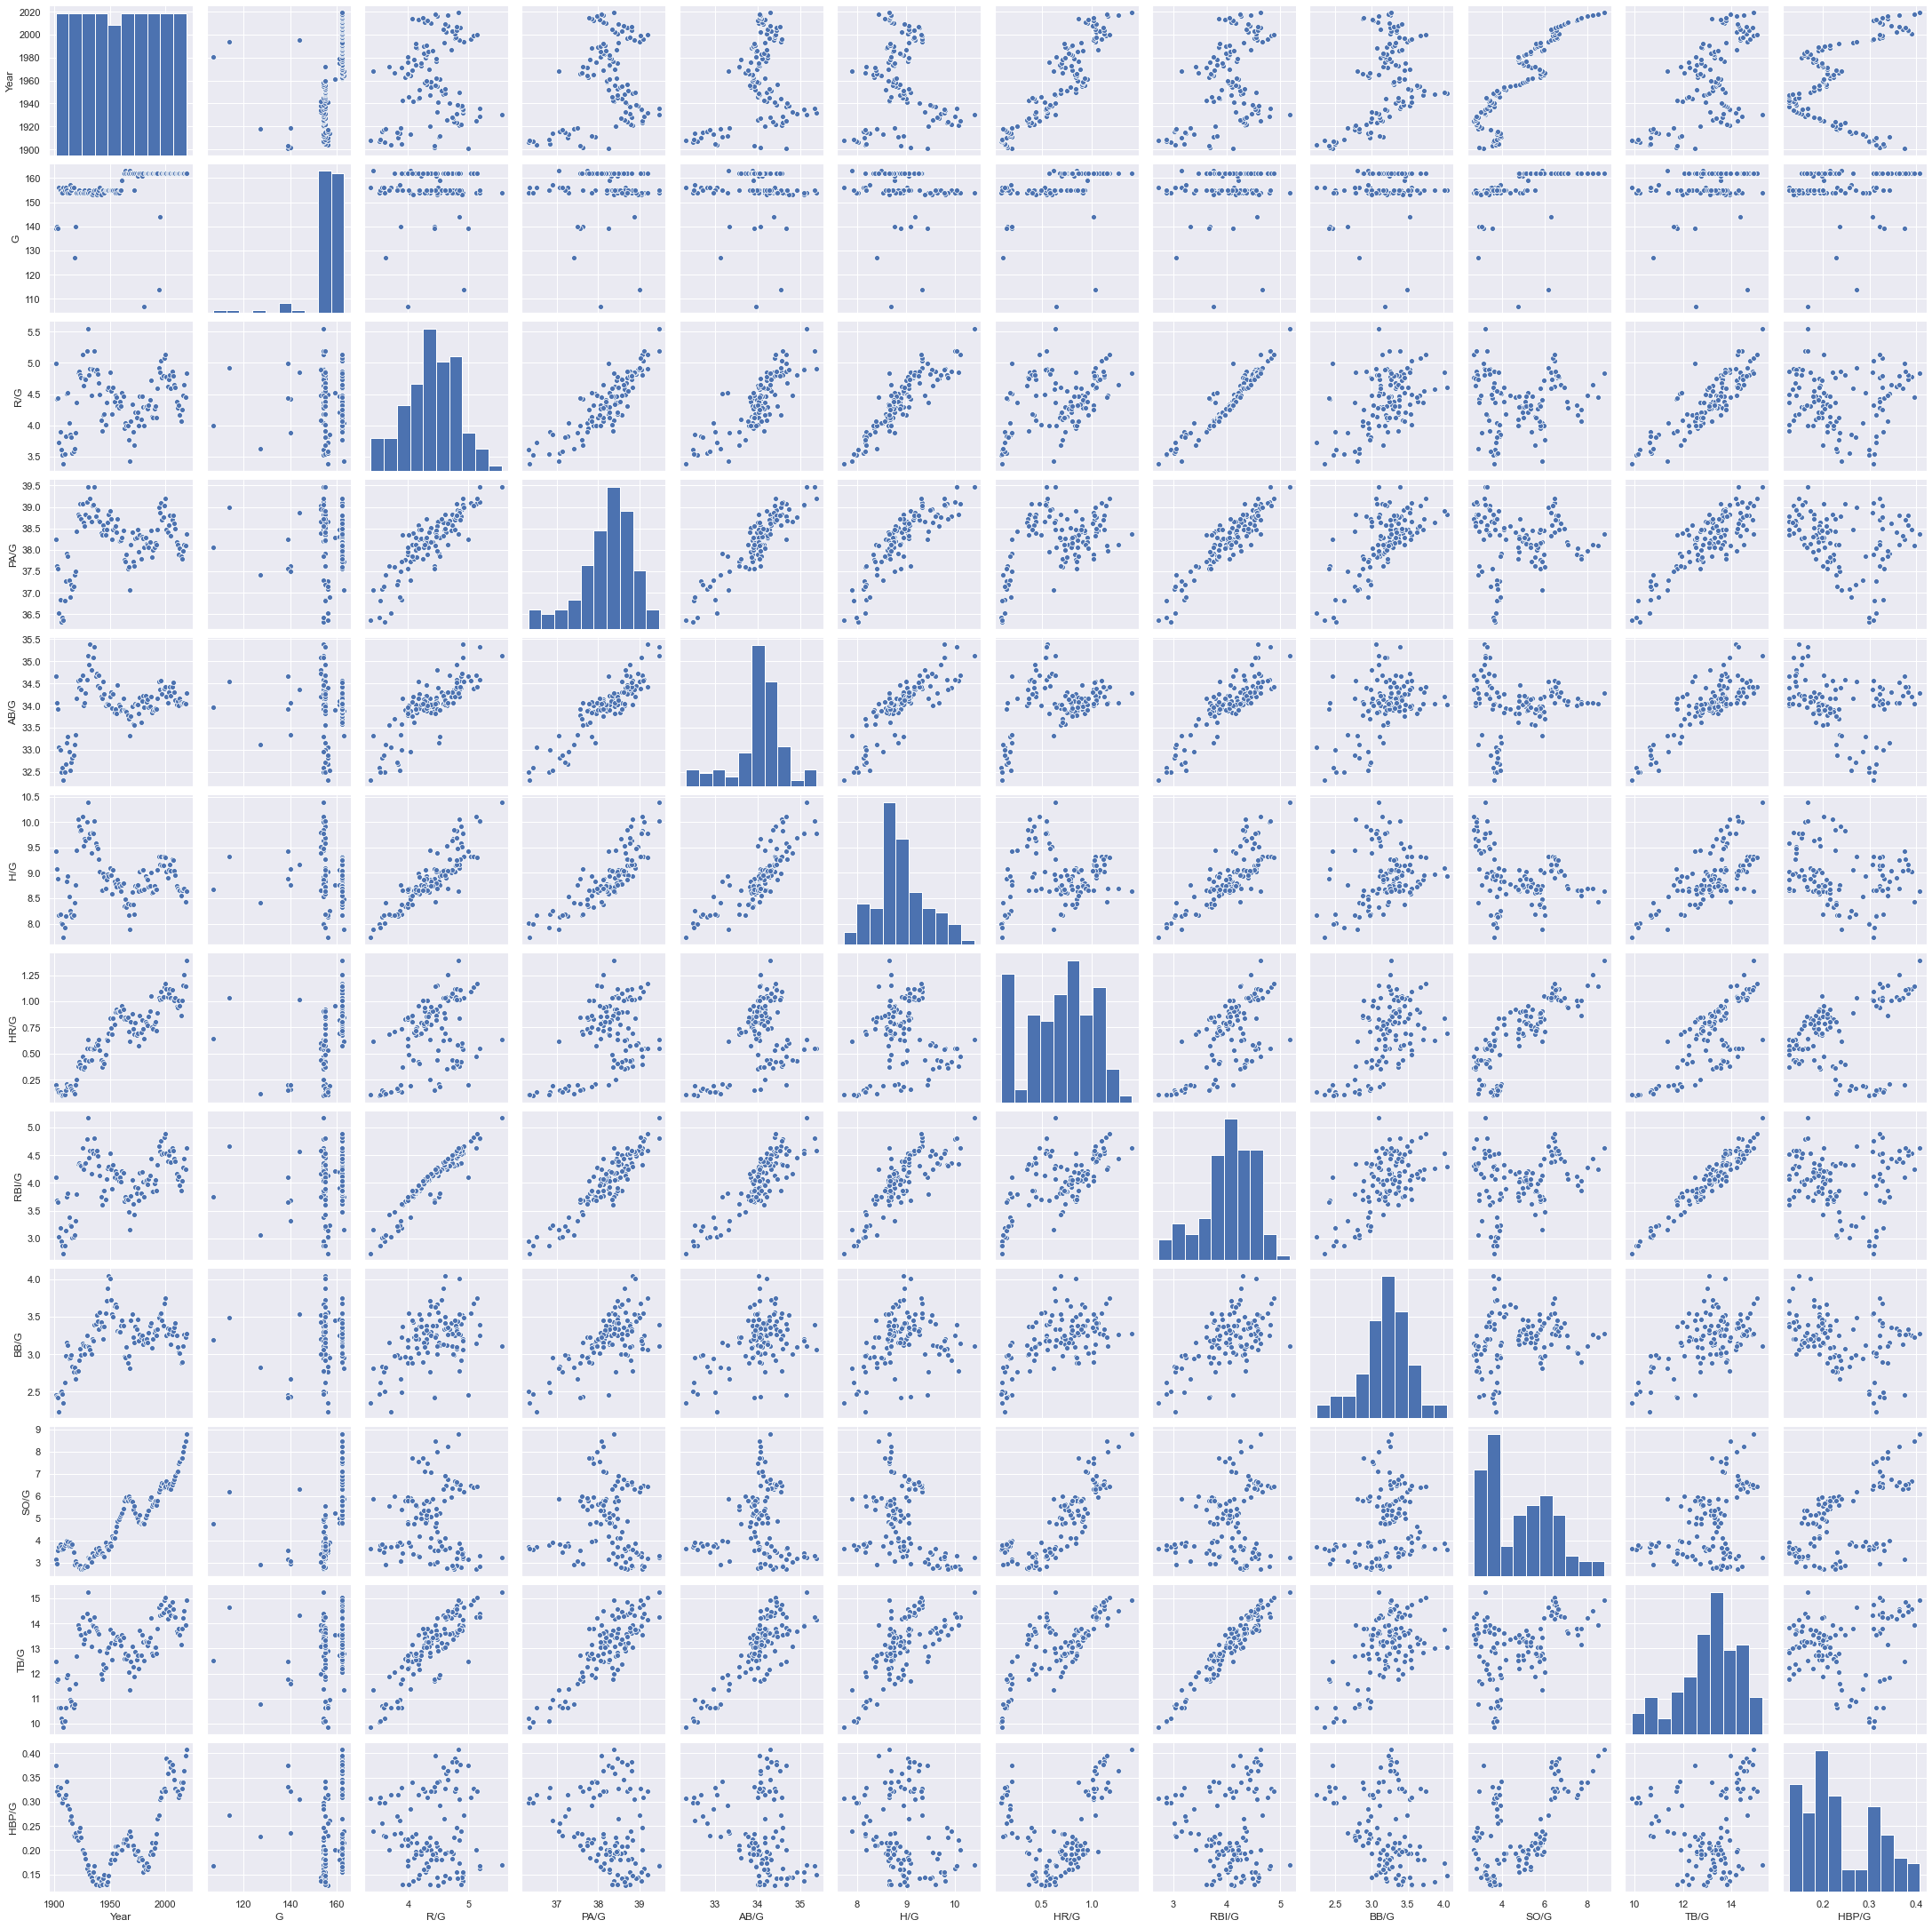

In [76]:
sns.pairplot(slug_rate_df)

In [3]:
with open('bb-int.pkl','rb') as cellar:
    att_df = pickle.load(cellar)

In [11]:
att_df.dtypes

Pop            float64
Network         object
Ratings        float64
Share          float64
Households      object
Viewers         object
Nework          object
Ratings        float64
Share          float64
Viewers         object
Tms            float64
G              float64
Time            object
Time/9I         object
Inn            float64
Inn%           float64
R/G            float64
PA/G           float64
Pitches/PA     float64
Batters/G      float64
Pitchers/G     float64
PH/G           float64
PR/G           float64
Batters/S      float64
Pitchers/S     float64
Attendance     float64
Attend/G       float64
Lg Payroll*     object
Payroll/Tm*     object
NormAtt        float64
NormAtt/G      float64
dtype: object

In [12]:
att_df['Year']=att_df.index.astype(int)

ValueError: Length of passed values is 30, index implies 1.

In [13]:
att_df.columns

Index(['Pop', 'Network', 'Ratings', 'Share', 'Households', 'Viewers', 'Nework',
       'Ratings', 'Share', 'Viewers', 'Tms', 'G', 'Time', 'Time/9I', 'Inn',
       'Inn%', 'R/G', 'PA/G', 'Pitches/PA', 'Batters/G', 'Pitchers/G', 'PH/G',
       'PR/G', 'Batters/S', 'Pitchers/S', 'Attendance', 'Attend/G',
       'Lg Payroll*', 'Payroll/Tm*', 'NormAtt', 'NormAtt/G', 'Year'],
      dtype='object')

In [14]:
att_df.dtypes

Pop            float64
Network         object
Ratings        float64
Share          float64
Households      object
Viewers         object
Nework          object
Ratings        float64
Share          float64
Viewers         object
Tms            float64
G              float64
Time            object
Time/9I         object
Inn            float64
Inn%           float64
R/G            float64
PA/G           float64
Pitches/PA     float64
Batters/G      float64
Pitchers/G     float64
PH/G           float64
PR/G           float64
Batters/S      float64
Pitchers/S     float64
Attendance     float64
Attend/G       float64
Lg Payroll*     object
Payroll/Tm*     object
NormAtt        float64
NormAtt/G      float64
Year             int64
dtype: object

In [15]:
att_df.set_index('Year',inplace=True)

In [19]:
att_df.drop(labels=1876,axis=0,inplace=True)
att_df.head(100)

,Pop,Network,Ratings,Share,Households,Viewers,Nework,Ratings,Share,Viewers,...,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*,NormAtt,NormAtt/G
Year,,,,,,,,,,,,,,,,,,,,,
1877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972,209900000.0,NBC,22.9,43.0,"14,220,000","26,300,000",NBC,27.6,58.0,--,...,1.33,0.26,23.9,15.3,26968268.0,14506.0,NaN,NaN,0.128482,0.000069
1973,211910000.0,NBC,23.8,45.0,"15,420,000","27,600,000",NBC,30.7,57.0,"34,750,000",...,1.11,0.27,24.3,15.1,30108926.0,15496.0,NaN,NaN,0.142084,0.000073
1974,213850000.0,NBC,23.4,44.0,"15,490,000",NotAvailable,NBC,25.6,46.0,"29,080,000",...,1.22,0.32,24.2,15.2,30025608.0,15437.0,NaN,NaN,0.140405,0.000072


In [20]:
pd.set_option("display.max_rows", 101)
att_df.drop(labels=list(range(1877,1901)),axis=0,inplace=True)
att_df.head(100)

,Pop,Network,Ratings,Share,Households,Viewers,Nework,Ratings,Share,Viewers,...,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*,NormAtt,NormAtt/G
Year,,,,,,,,,,,,,,,,,,,,,
1901,77580000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3603615.0,3246.0,NaN,NaN,0.046450,0.000042
1902,79160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3889466.0,3482.0,NaN,NaN,0.049134,0.000044
1903,80630000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4735250.0,4250.0,NaN,NaN,0.058728,0.000053
1904,82170000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5688299.0,4554.0,NaN,NaN,0.069226,0.000055
1905,83820000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5855062.0,4733.0,NaN,NaN,0.069853,0.000056
1906,85450000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5719289.0,4657.0,NaN,NaN,0.066931,0.000054
1907,87010000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6038984.0,4897.0,NaN,NaN,0.069406,0.000056
1908,88710000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.47,0.03,20.4,11.4,7123474.0,5726.0,NaN,NaN,0.080301,0.000065
1909,90490000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.48,0.03,22.6,13.5,7236290.0,5831.0,NaN,NaN,0.079968,0.000064


In [22]:
pd.set_option('display.max_columns',50)
cols = att_df.columns
cols

Index(['Pop', 'Network', 'Ratings', 'Share', 'Households', 'Viewers', 'Nework',
       'Ratings', 'Share', 'Viewers', 'Tms', 'G', 'Time', 'Time/9I', 'Inn',
       'Inn%', 'R/G', 'PA/G', 'Pitches/PA', 'Batters/G', 'Pitchers/G', 'PH/G',
       'PR/G', 'Batters/S', 'Pitchers/S', 'Attendance', 'Attend/G',
       'Lg Payroll*', 'Payroll/Tm*', 'NormAtt', 'NormAtt/G'],
      dtype='object')

In [24]:
cols = list(cols)
cols[1:5] = ['ASG Network','ASG Ratings','ASG Share','ASG Households','ASG Viewers']
cols[6:9] = ['WS Network','WS Ratings','WS Share','WS Viewers']
cols

['Pop',
 'ASG Network',
 'ASG Ratings',
 'ASG Share',
 'ASG Households',
 'ASG Viewers',
 'WS Network',
 'WS Ratings',
 'WS Share',
 'WS Viewers',
 'Share',
 'Viewers',
 'Tms',
 'G',
 'Time',
 'Time/9I',
 'Inn',
 'Inn%',
 'R/G',
 'PA/G',
 'Pitches/PA',
 'Batters/G',
 'Pitchers/G',
 'PH/G',
 'PR/G',
 'Batters/S',
 'Pitchers/S',
 'Attendance',
 'Attend/G',
 'Lg Payroll*',
 'Payroll/Tm*',
 'NormAtt',
 'NormAtt/G']

In [25]:
len(cols)

33

In [26]:
len(att_df.columns)

31

In [28]:
cols.remove('Share')
cols.remove('Viewers')
cols

['Pop',
 'ASG Network',
 'ASG Ratings',
 'ASG Share',
 'ASG Households',
 'ASG Viewers',
 'WS Network',
 'WS Ratings',
 'WS Share',
 'WS Viewers',
 'Tms',
 'G',
 'Time',
 'Time/9I',
 'Inn',
 'Inn%',
 'R/G',
 'PA/G',
 'Pitches/PA',
 'Batters/G',
 'Pitchers/G',
 'PH/G',
 'PR/G',
 'Batters/S',
 'Pitchers/S',
 'Attendance',
 'Attend/G',
 'Lg Payroll*',
 'Payroll/Tm*',
 'NormAtt',
 'NormAtt/G']

In [31]:

att_df.head()

,Pop,Network,Ratings,Share,Households,Viewers,Nework,Ratings,Share,Viewers,Tms,G,Time,Time/9I,Inn,Inn%,R/G,PA/G,Pitches/PA,Batters/G,Pitchers/G,PH/G,PR/G,Batters/S,Pitchers/S,Attendance,Attend/G,Lg Payroll*,Payroll/Tm*,NormAtt,NormAtt/G
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1901,77580000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1110.0,NaN,NaN,NaN,NaN,9.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3603615.0,3246.0,NaN,NaN,0.046450,0.000042
1902,79160000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1117.0,NaN,NaN,NaN,NaN,8.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3889466.0,3482.0,NaN,NaN,0.049134,0.000044
1903,80630000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1114.0,NaN,NaN,NaN,NaN,8.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4735250.0,4250.0,NaN,NaN,0.058728,0.000053
1904,82170000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1249.0,NaN,NaN,NaN,NaN,7.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5688299.0,4554.0,NaN,NaN,0.069226,0.000055
1905,83820000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,1237.0,NaN,NaN,NaN,NaN,7.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5855062.0,4733.0,NaN,NaN,0.069853,0.000056


In [32]:
old_cols = list(att_df.columns)
old_cols = old_cols[1:9]
old_cols

['Network',
 'Ratings',
 'Share',
 'Households',
 'Viewers',
 'Nework',
 'Ratings',
 'Share']

In [33]:
new_cols = cols[1:9]
new_cols

['ASG Network',
 'ASG Ratings',
 'ASG Share',
 'ASG Households',
 'ASG Viewers',
 'WS Network',
 'WS Ratings',
 'WS Share']

In [34]:
old_cols = list(att_df.columns)
old_cols = old_cols[1:10]
old_cols

['Network',
 'Ratings',
 'Share',
 'Households',
 'Viewers',
 'Nework',
 'Ratings',
 'Share',
 'Viewers']

In [35]:
new_cols = cols[1:10]
new_cols

['ASG Network',
 'ASG Ratings',
 'ASG Share',
 'ASG Households',
 'ASG Viewers',
 'WS Network',
 'WS Ratings',
 'WS Share',
 'WS Viewers']

In [36]:
rosetta = dict(zip(old_cols,new_cols))
rosetta

{'Network': 'ASG Network',
 'Ratings': 'WS Ratings',
 'Share': 'WS Share',
 'Households': 'ASG Households',
 'Viewers': 'WS Viewers',
 'Nework': 'WS Network'}

In [37]:
as_old = list(att_df.columns)
as_old = as_old[1:6]
as_old

['Network', 'Ratings', 'Share', 'Households', 'Viewers']

In [38]:
as_new = cols[1:6]
as_ros = dict(zip(as_old,as_new))
as_ros

{'Network': 'ASG Network',
 'Ratings': 'ASG Ratings',
 'Share': 'ASG Share',
 'Households': 'ASG Households',
 'Viewers': 'ASG Viewers'}

In [39]:
att_df = att_df.rename(columns=as_ros)
att_df.columns

Index(['Pop', 'ASG Network', 'ASG Ratings', 'ASG Share', 'ASG Households',
       'ASG Viewers', 'Nework', 'ASG Ratings', 'ASG Share', 'ASG Viewers',
       'Tms', 'G', 'Time', 'Time/9I', 'Inn', 'Inn%', 'R/G', 'PA/G',
       'Pitches/PA', 'Batters/G', 'Pitchers/G', 'PH/G', 'PR/G', 'Batters/S',
       'Pitchers/S', 'Attendance', 'Attend/G', 'Lg Payroll*', 'Payroll/Tm*',
       'NormAtt', 'NormAtt/G'],
      dtype='object')

In [40]:
att_df.columns = cols

In [41]:
att_df.columns

Index(['Pop', 'ASG Network', 'ASG Ratings', 'ASG Share', 'ASG Households',
       'ASG Viewers', 'WS Network', 'WS Ratings', 'WS Share', 'WS Viewers',
       'Tms', 'G', 'Time', 'Time/9I', 'Inn', 'Inn%', 'R/G', 'PA/G',
       'Pitches/PA', 'Batters/G', 'Pitchers/G', 'PH/G', 'PR/G', 'Batters/S',
       'Pitchers/S', 'Attendance', 'Attend/G', 'Lg Payroll*', 'Payroll/Tm*',
       'NormAtt', 'NormAtt/G'],
      dtype='object')

In [42]:
with open('bb-int.pkl','wb') as cellar:
    pickle.dump(att_df,cellar)

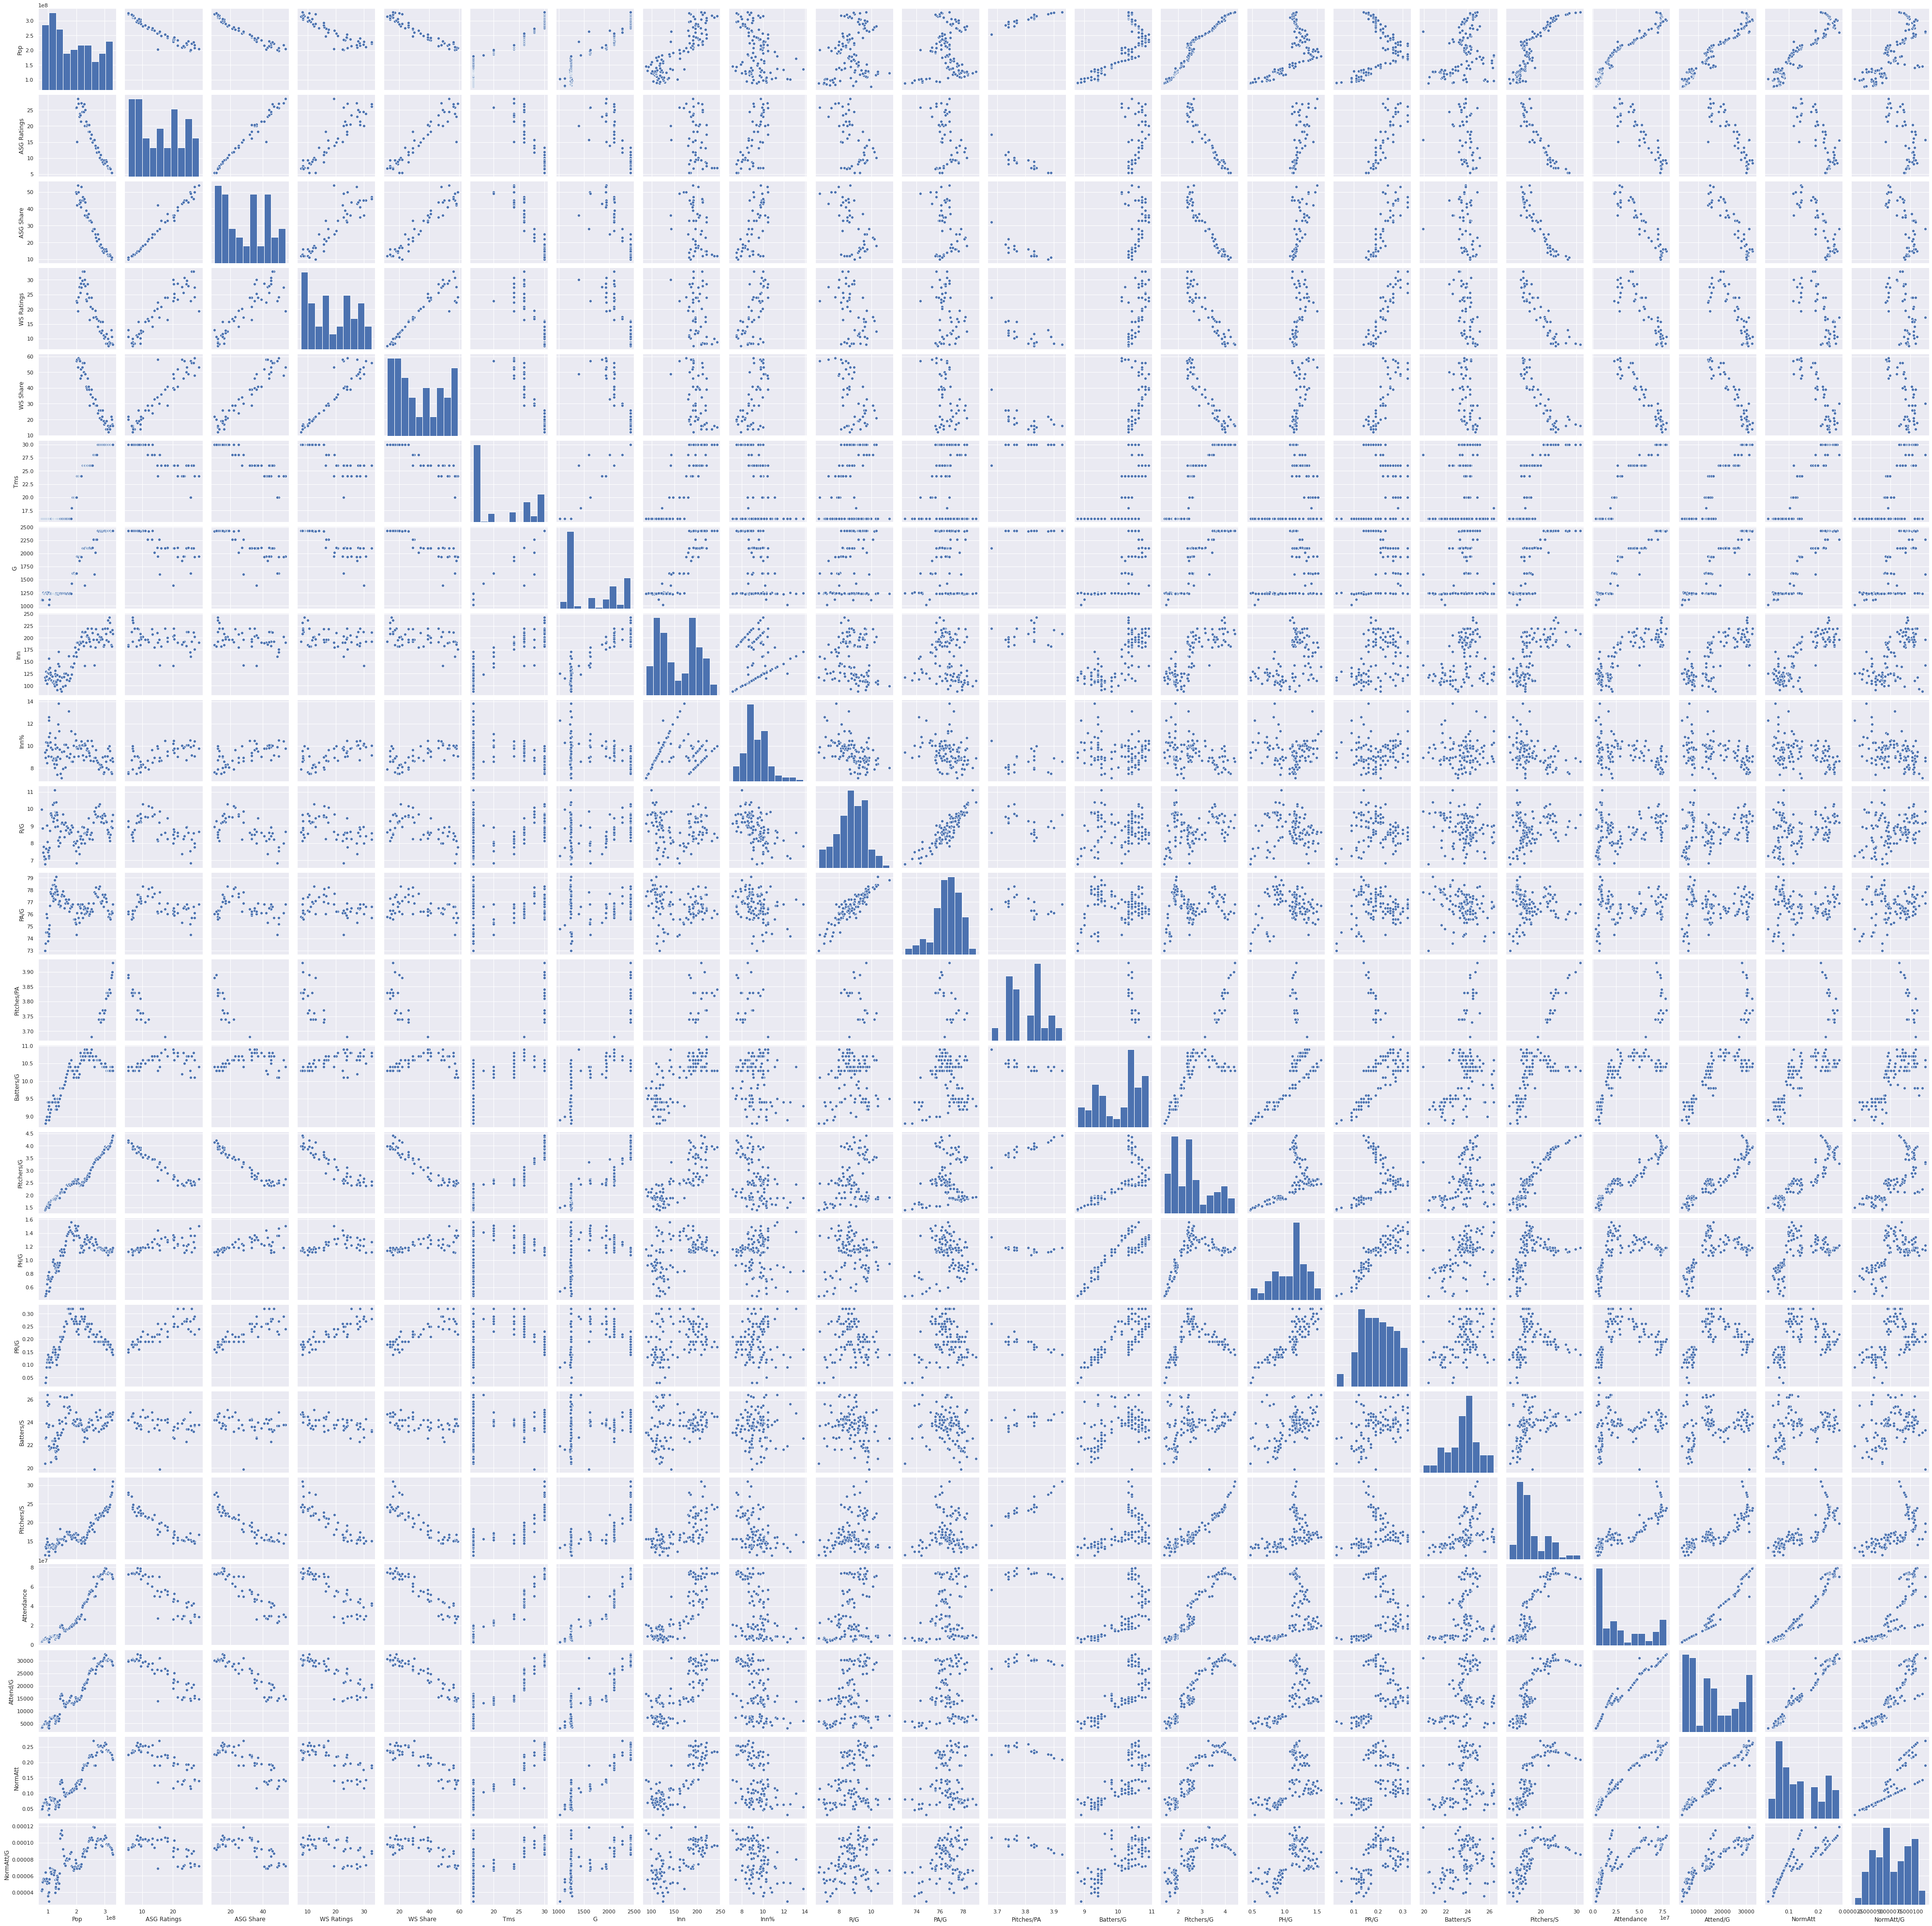

In [43]:
sns.pairplot(att_df)